# Random Forest Model Training and Evaluation

In this section, we trained and evaluated a Random Forest Regression model for cylinder surface area prediction. Here's a quick overview:

- **Data Preparation**: We loaded and split the data into training and testing sets.

- **Preprocessing**: We applied Standard Scaling to ensure consistent feature scaling.

- **Model Selection**: We chose the powerful Random Forest Regressor.

- **Hyperparameter Tuning**: GridSearchCV helped us find the best model parameters.

- **Model Training**: A pipeline ensured consistent preprocessing during training.

- **Model Evaluation**: We assessed performance using MAE, and R2 scores.

- **Model Serialization**: The model was saved using joblib.



In [2]:
#libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Loading train and test sets and making feature and target sets

In [3]:
# loading train data and test data
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')
print('Data is loaded')


Data is loaded


In [4]:
train.head()

,radius,height,surface_area
0,58.683066,19.279257,28746.000765
1,36.864959,42.650420,18418.096833
2,30.407700,74.032807,19954.112465
3,24.373606,6.965869,4799.448915
4,42.912396,61.400158,28125.432259


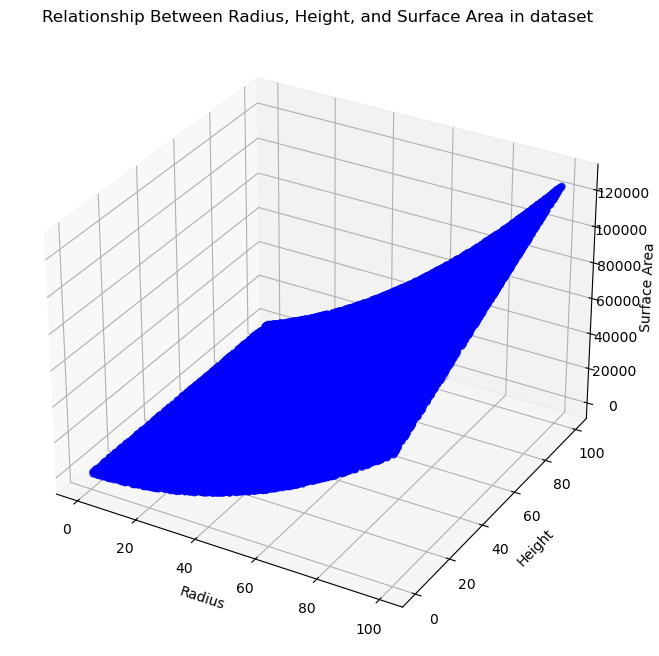

In [5]:
radius = train['radius']
height = train['height']
surface_area = train['surface_area']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(radius, height, surface_area, c='b', marker='o', alpha=0.7)
ax.set_xlabel('Radius')
ax.set_ylabel('Height')
ax.set_zlabel('Surface Area')
plt.title('Relationship Between Radius, Height, and Surface Area in dataset')
plt.show()

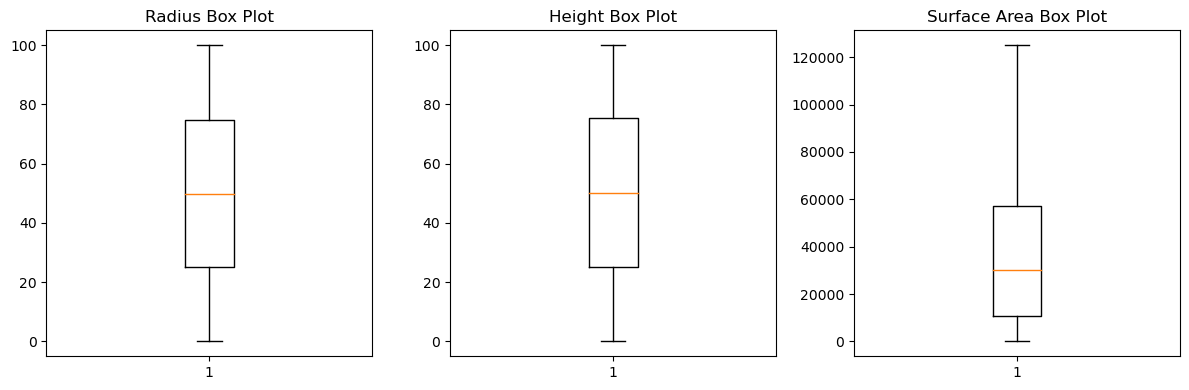

(array([27956], dtype=int64), array([2], dtype=int64))


In [13]:
#boxplot
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.boxplot(train['radius'])
plt.title('Radius Box Plot')

plt.subplot(132)
plt.boxplot(train['height'])
plt.title('Height Box Plot')

plt.subplot(133)
plt.boxplot(train['surface_area'])
plt.title('Surface Area Box Plot')

plt.tight_layout()
plt.show()


#removing outliers
from scipy import stats
z = np.abs(stats.zscore(train))
print(np.where(z > 3))

In [15]:
#removing outliers
from scipy import stats
z = np.abs(stats.zscore(train))
train = train[(z < 3).all(axis=1)]

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   radius        39999 non-null  float64
 1   height        39999 non-null  float64
 2   surface_area  39999 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [17]:
#splitting the data into train and test
def split_data(train, test):
    X_train = train[['radius', 'height']]
    y_train = train['surface_area']
    
    X_test = test[['radius', 'height']]
    y_test = test['surface_area']
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(train, test)

### Model training and evaluation

In [18]:
# Preprocessing
preprocessor = StandardScaler()

# Random Forest Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, verbose=3)

# Creating a pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', random_forest_model)
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the model
rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Best Random Forest Model MAE: {mae}')
print(f'Best Random Forest Model R2: {r2}')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   42.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Best Random Forest Model MAE: 68.75021933767113
Best Random Forest Model R2: 0.9999877000407323


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished


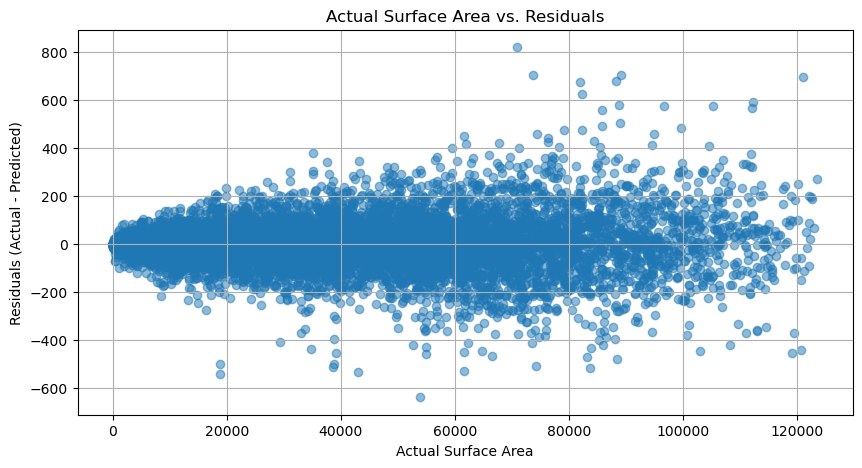

In [8]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title("Actual Surface Area vs. Residuals")
plt.xlabel("Actual Surface Area")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


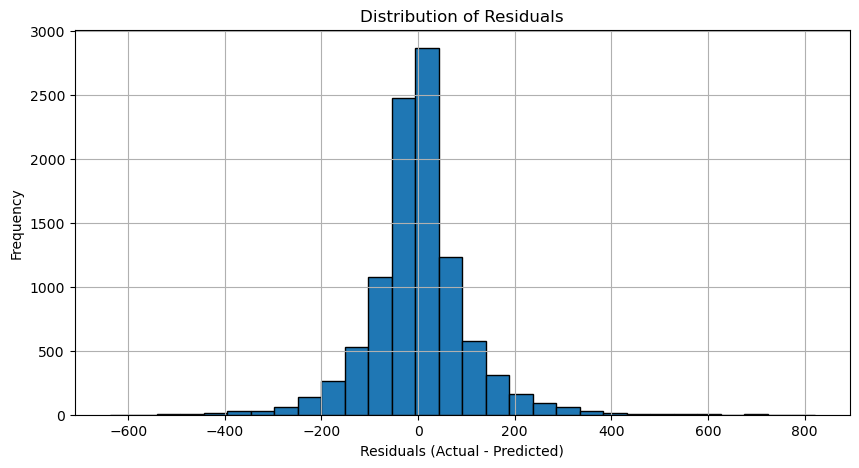

In [9]:

# Residuals Histogram
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### saving the model

In [20]:
#saving the model
import joblib 
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']